In [20]:
import numpy as np
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load utility value dataset

In [21]:
pairwise_util = np.load('utils_100_pairs.npy')
indiv_util = np.load('utils_100_indiv.npy')
batch_num_nodes = np.load('utils_100_batch_num_nodes.npy')
batch_num_edges = np.load('utils_100_batch_num_edges.npy')
obs = np.load('obs_100.npy')

In [22]:
# Get each alive attacker's distance to the fort
def get_attacker_dist_to_door(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    alive_attacker_dist = np.concatenate([np.sum((a-np.array([[0.0,0.8]]))**2, axis=-1)**0.5 for a in alive_attackers_pos])
    return alive_attacker_dist, num_defenders, num_attackers

def get_defender_dist_to_door(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    alive_defender_dist = np.concatenate([np.sum((a-np.array([[0.0,0.8]]))**2, axis=-1)**0.5 for a in alive_defenders_pos])
    return alive_defender_dist, num_defenders, num_attackers
    

In [23]:
alive_attacker_dist = [get_attacker_dist_to_door(ob) for ob in obs]

In [24]:
# get the mean attacker's 
def get_indiv_def_utils_only(utils, attacker_nums, defender_nums):
    total_agents = 0
    indiv_utils_out = []
    for a_num, d_num in zip(attacker_nums, defender_nums):
        if a_num != 0:
            indiv_utils_out.append(np.average(utils[total_agents+d_num: total_agents+a_num+d_num, :], axis=-1))
        else:
            indiv_utils_out.append(np.asarray([]))
        total_agents += a_num + d_num
        
    return np.concatenate(indiv_utils_out)

In [25]:
indiv_util_terms = [get_indiv_def_utils_only(util, ob[2], ob[1]) for util, ob in zip(indiv_util, alive_attacker_dist)]

In [26]:
alive_def_dist = np.concatenate([dist[0] for dist in alive_attacker_dist])
indiv_util_term_final = np.concatenate(indiv_util_terms)

## Plotting correlation between distance to fort and average single utility value for attackers

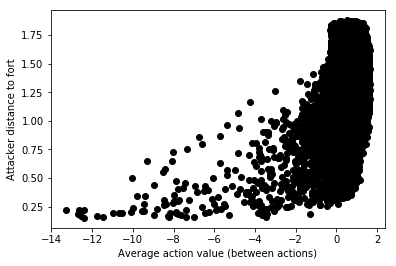

In [27]:
# Visualization checked for data generated by the final checkpointed value network only.

import numpy as np
import matplotlib.pyplot as plt

x = indiv_util_term_final 
y = alive_def_dist

plt.xlabel("Average action value (between actions)")
plt.ylabel("Attacker distance to fort")
plt.plot(x, y, 'o', color='black')

In [28]:
# Check the correlation of both
scipy.stats.pearsonr(x,y)

(0.25281393712854966, 0.0)

## Plotting correlation between distance to learning agent and average single utility value for attackers

In [29]:
def get_attacker_dist_to_adhoc_agent(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    adhoc_agent_loc = defender_data[:,0,1:3]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    dist_dif = np.concatenate(
        [(np.sum((x-np.asarray([y]))**2, axis=-1))**0.5 for x,y in zip(alive_attackers_pos, adhoc_agent_loc)]
    )
    return dist_dif

def get_defender_dist_to_adhoc_agent(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    adhoc_agent_loc = defender_data[:,0,1:3]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    dist_dif = np.concatenate(
        [(np.sum((x-np.asarray([y]))**2, axis=-1))**0.5 for x,y in zip(alive_defenders_pos, adhoc_agent_loc)]
    )
    return dist_dif
    

In [30]:
get_attacker_dist_to_adhoc_agent(obs[0])

array([1.5131553, 1.5094919, 1.7122737, 1.6699936, 1.4370776, 1.4177972,
       1.5131553, 1.5094919, 1.7122737, 1.6699936, 1.4370776, 1.4177972,
       1.5514176, 1.4576832, 1.5100608, 1.5249097, 1.6605551, 1.4588845,
       1.5551647, 1.534127 , 1.4747585, 1.410215 , 1.4814186, 1.4698579],
      dtype=float32)

In [31]:
dist_to_adhoc = np.concatenate([get_attacker_dist_to_adhoc_agent(ob) for ob in obs], axis=-1)

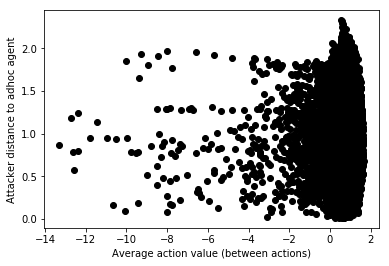

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = indiv_util_term_final 
y = dist_to_adhoc

plt.xlabel("Average action value (between actions)")
plt.ylabel("Attacker distance to adhoc agent")
plt.plot(x, y, 'o', color='black')

## 3D Scatterplot of distance to fort, distance to learning agent, and average singular utility value for attackers

<IPython.core.display.Javascript object>


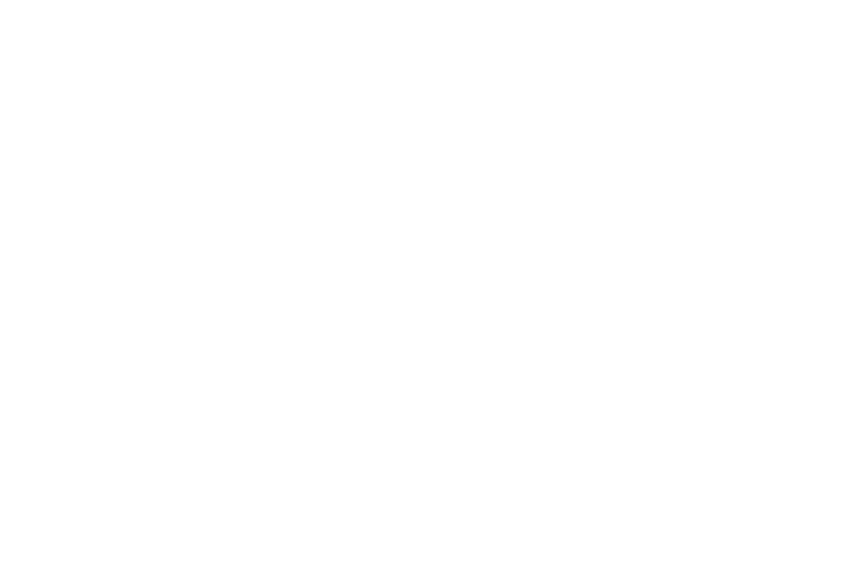

<IPython.core.display.Javascript object>


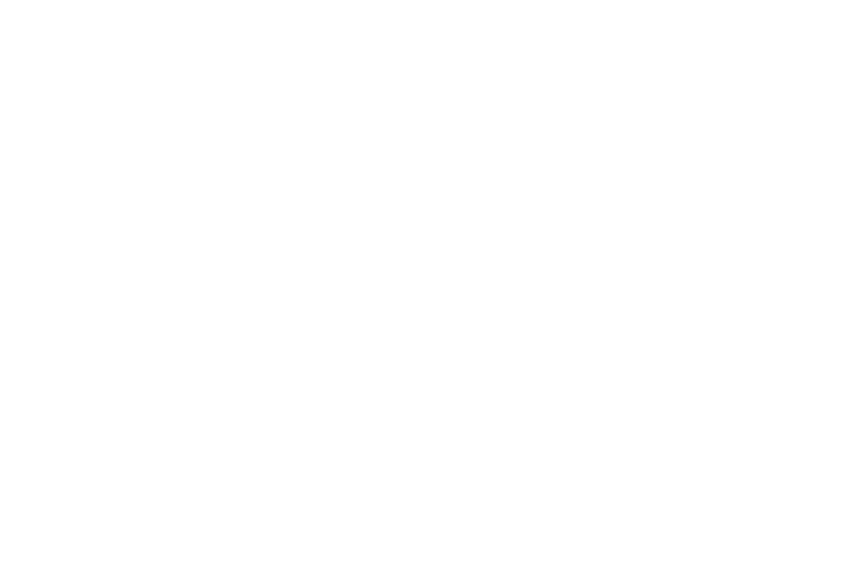

In [33]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sampled_ids = np.random.choice(len(dist_to_adhoc), 10000, replace=False)

x = alive_def_dist[sampled_ids]
y = dist_to_adhoc[sampled_ids]
z = indiv_util_term_final[sampled_ids]


ax.scatter(x, y, z, c='r', marker='o')

ax.set_ylabel('Dist to Ad Hoc')
ax.set_xlabel('Dist to Fort')
ax.set_zlabel('Indiv util')

plt.show()

<IPython.core.display.Javascript object>


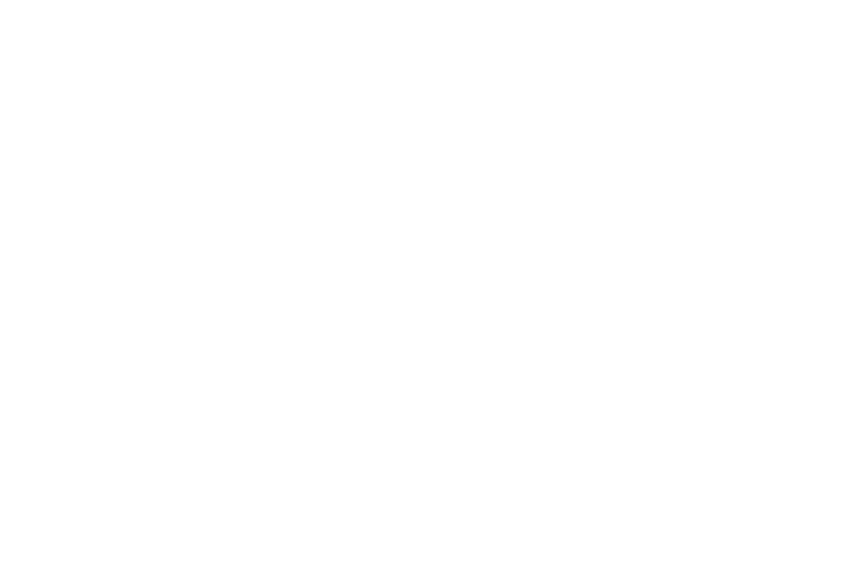

<IPython.core.display.Javascript object>


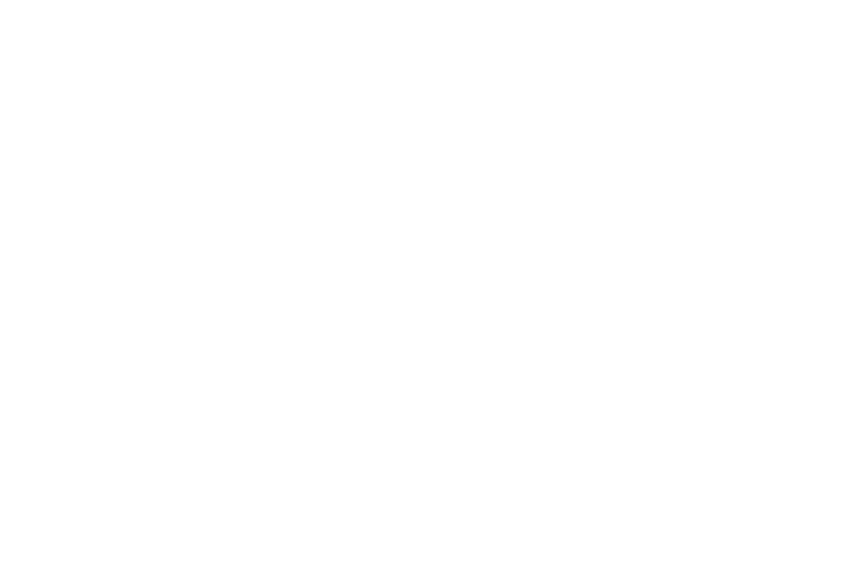

In [34]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sampled_ids = indiv_util_term_final < -1

x = alive_def_dist[sampled_ids]
y = dist_to_adhoc[sampled_ids]
z = indiv_util_term_final[sampled_ids]


ax.scatter(x, y, z, c='r', marker='o')

ax.set_ylabel('Dist to Ad Hoc')
ax.set_xlabel('Dist to Fort')
ax.set_zlabel('Indiv util')

plt.show()

In [35]:
## Getting several features of attackers

In [36]:
def get_defender_to_adhoc_agent_rel(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    adhoc_agent_loc = defender_data[:,0,1:3]
    adhoc_agent_loc_ang = defender_data[:,0,1:4]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    alive_defenders_pos_n_ang = [data[data[:,0] == 1][:,1:4] for data in defender_data]
    alive_attackers_pos_n_ang = [data[data[:,0] == 1][:,1:4] for data in attacker_data]
    
    dist_dif = np.concatenate(
        [(np.sum((x-np.asarray([y]))**2, axis=-1))**0.5 for x,y in zip(alive_attackers_pos, adhoc_agent_loc)]
    )
    in_rad = dist_dif < 0.8
    
    is_in_adhoc_vicinity = []
    is_in_attacker_vicinity = []
    
    for x,y in zip(alive_attackers_pos_n_ang, adhoc_agent_loc_ang):
        A_adhoc = get_tri_pts_arr(np.array([y[0], y[1]]), y[2])
        b_adhoc = np.array([y[0], y[1]])
        for attacker_data in x:
            A_attacker = get_tri_pts_arr(
                np.array([attacker_data[0], attacker_data[1]]), attacker_data[2]
            )
            b_attacker = np.array([attacker_data[0], attacker_data[1]])
            
            is_in_adhoc_vicinity.append(laser_hit(A_adhoc, b_attacker))
            is_in_attacker_vicinity.append(laser_hit(A_attacker, b_adhoc))
            
    ad_hoc_vin = np.array(is_in_adhoc_vicinity)
    attacker_vin = np.array(is_in_attacker_vicinity)
    return in_rad, ad_hoc_vin, attacker_vin

In [37]:
def svd_sol(A, b):
    U, sigma, Vt = np.linalg.svd(A)
    sigma[sigma<1e-10] = 0
    sigma_reci = [(1/s if s!=0 else 0) for s in sigma]
    sigma_reci = np.diag(sigma_reci)
    x = Vt.transpose().dot(sigma_reci).dot(U.transpose()).dot(b)
    return(x)
    
def get_tri_pts_arr(p_pos, p_ang):
    ang = p_ang
    shootRad = 0.8
    size = 0.05
    shootWin = np.pi/4
        
    pt1 = p_pos+size*np.array([np.cos(ang), np.sin(ang)])
    pt2 = pt1 + shootRad*np.array([np.cos(ang+shootWin/2), np.sin(ang+shootWin/2)])
    pt3 = pt1 + shootRad*np.array([np.cos(ang-shootWin/2), np.sin(ang-shootWin/2)])
        
    A = np.array([[pt1[0], pt2[0], pt3[0]],
                [pt1[1], pt2[1], pt3[1]],
                [     1,      1,      1]])       
    return(A)
    
def laser_hit(A, p_pos):
    b = np.array([[p_pos[0]],[p_pos[1]],[1]])
    x = svd_sol(A,b)
    if np.all(x>=0):
        return(True)
    else:
        return(False)

In [38]:
rels_out = [get_defender_to_adhoc_agent_rel(ob) for ob in obs]

In [39]:
in_rad_feats = np.concatenate([rel[0] for rel in rels_out])
ad_hoc_vin_feats = np.concatenate([rel[1] for rel in rels_out])
attacker_vin_feats = np.concatenate([rel[2] for rel in rels_out])

### Predicting the average individual utility value based on the derived features using xgboost.

In [40]:
import pandas as pd

df2 = pd.DataFrame(np.transpose(
        np.array(
            [alive_def_dist, dist_to_adhoc, in_rad_feats, ad_hoc_vin_feats, attacker_vin_feats]
        )
    ), columns=[
        'dist_to_fort', 'dist_to_adhoc_agent', 'in_shooting_of_each_other', 'attacker_in_ad_hoc_shooting_cone', 'ad_hoc_in_attacker_shooting_cone'
    ]
)

In [41]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    max_depth=4, n_estimators=20
)
regressor.fit(df2, indiv_util_term_final)

/Users/arrasy/miniconda2/envs/docEnv/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
# Compute the feature importances based on the trained model
regressor.feature_importances_

array([0.6040704 , 0.18116021, 0.        , 0.13201822, 0.08275109],
      dtype=float32)

In [43]:
from xgboost import plot_tree

In [44]:
# Save model in xgb_model.txt
regressor.get_booster().dump_model('xgb_model.txt', with_stats=True)

## Pairwise Utility Analysis

## Getting features for attacker-defender pairs for the "Shoot" pairwise utility prediction using XGBoost

In [45]:
# Get pairwise util data for attacker-defender pairs.

# distance_to_between : distance between all possible pairs of attackers and guards
# guard_dist_to_fort : For each possible attacker-guard pairing, get distance of guard to fort.
# attacker_dist_to_fort: For each possible attacker-guard pairing, get distance of attacker to fort.
# in_rad : For a pair of guard-attacker agents, get whether they are in each other's shoot radius.
# ad_hoc_vin : For a pair of guard-attacker agents, check if attacker in ad hoc agent's shooting range.
# attacker_vin : For a pair of guard-attacker agents, check if ad hoc agent in attacker agent's shooting range.

def get_attacker_to_defender_rel(obs):
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    alive_defenders_pos = [data[data[:,0] == 1][:,1:3] for data in defender_data]
    alive_attackers_pos = [data[data[:,0] == 1][:,1:3] for data in attacker_data]
    
    alive_defenders_pos_n_ang = [data[data[:,0] == 1][:,1:4] for data in defender_data]
    alive_attackers_pos_n_ang = [data[data[:,0] == 1][:,1:4] for data in attacker_data]
    
    a_dist_to_fort = []
    b_dist_to_fort = []
    is_close = []
    distance_to_between = []
    is_in_guard_vicinity = []
    is_in_attacker_vicinity = []
    
    for alive_defender_pos_n_ang, alive_attacker_pos_n_ang in zip(alive_defenders_pos_n_ang, alive_attackers_pos_n_ang):
        for y in alive_defender_pos_n_ang:
            A_adhoc = get_tri_pts_arr(np.array([y[0], y[1]]), y[2])
            b_adhoc = np.array([y[0], y[1]])
            for attacker_data in alive_attacker_pos_n_ang:
                A_attacker = get_tri_pts_arr(
                    np.array([attacker_data[0], attacker_data[1]]), attacker_data[2]
                )
                b_attacker = np.array([attacker_data[0], attacker_data[1]])
                if (np.sum((b_adhoc - b_attacker)**2)**0.5) < 0.8:
                    is_close.append(True)
                else:
                    is_close.append(False)
                  
                distance_to_between.append(np.sum((b_adhoc - b_attacker)**2)**0.5)
                a_dist_to_fort.append((np.sum((b_adhoc - np.array([0.0, 0.8]))**2)**0.5))
                b_dist_to_fort.append((np.sum((b_attacker - np.array([0.0, 0.8]))**2)**0.5))
                is_in_guard_vicinity.append(laser_hit(A_adhoc, b_attacker))
                is_in_attacker_vicinity.append(laser_hit(A_attacker, b_adhoc))
      
    distance_to_between_np = np.array(distance_to_between)
    guard_dist_to_fort = np.array(a_dist_to_fort)
    attacker_dist_to_fort = np.array(b_dist_to_fort)
    in_rad = np.array(is_close)
    ad_hoc_vin = np.array(is_in_guard_vicinity)
    attacker_vin = np.array(is_in_attacker_vicinity)
    return distance_to_between, guard_dist_to_fort, attacker_dist_to_fort, in_rad, ad_hoc_vin, attacker_vin

In [46]:
obs_pair_rels = [get_attacker_to_defender_rel(ob) for ob in obs]

In [47]:
#Unpack every feature

distance_between_agents = np.concatenate([ob[0] for ob in obs_pair_rels])
guard_to_fort = np.concatenate([ob[1] for ob in obs_pair_rels])
attacker_to_fort = np.concatenate([ob[2] for ob in obs_pair_rels])
in_radius = np.concatenate([ob[3] for ob in obs_pair_rels])
in_guard_shoot_range = np.concatenate([ob[4] for ob in obs_pair_rels])
in_attacker_shoot_range = np.concatenate([ob[5] for ob in obs_pair_rels])

In [48]:
# Get the pairwise util matrices for dataset

def get_agent_pairwise_matrices(obs, pairwise_utils):
    
    defender_data = obs[:,:5,:]
    attacker_data = obs[:,5:,:]
    
    num_defenders = np.sum(defender_data[:,:,0]==1, axis = -1)
    num_attackers = np.sum(attacker_data[:,:,0]==1, axis = -1)
    
    all_retrieved_indices = []
    offset = 0
    
    for num_defender, num_attacker in zip(num_defenders, num_attackers):
        num_total = num_defender + num_attacker
        if num_total > 1:
            retrieved_indices = [
                offset + d_id*(num_total-1) + num_defender - 1 + a_id 
                for d_id in range(num_defender)
                for a_id in range(num_attacker)
            ]
            all_retrieved_indices.extend(retrieved_indices)
            offset += num_total * (num_total - 1)
    
            
    return pairwise_utils[all_retrieved_indices, :, :]


        
    
    

In [49]:
pairwise_list = [get_agent_pairwise_matrices(ob, pairwise_ut) for ob, pairwise_ut in zip(obs, pairwise_util)]

In [50]:
all_pairwise_list = np.concatenate(pairwise_list, axis=0)

In [51]:
# Get the entries in the pairwise utility matrix associated with defenders shooting.
# Uncomment last line if you want to get utils when attackers shoot instead.

all_pairwise_list_shoot = all_pairwise_list[:,:,7]
# all_pairwise_list_shoot = all_pairwise_list[:,7,:]

In [52]:
mean_shoots = np.mean(all_pairwise_list_shoot, axis= -1)

In [53]:
distance_between_agents = np.concatenate([ob[0] for ob in obs_pair_rels])
guard_to_fort = np.concatenate([ob[1] for ob in obs_pair_rels])
attacker_to_fort = np.concatenate([ob[2] for ob in obs_pair_rels])
in_radius = np.concatenate([ob[3] for ob in obs_pair_rels])
in_guard_shoot_range = np.concatenate([ob[4] for ob in obs_pair_rels])
in_attacker_shoot_range = np.concatenate([ob[5] for ob in obs_pair_rels])
df3 = pd.DataFrame(np.transpose(
        np.array(
            [distance_between_agents, guard_to_fort, attacker_to_fort, in_radius, in_guard_shoot_range, in_attacker_shoot_range]
        )
    ), columns=[
        'distance_between_agents', 'dist_guard_to_fort', 'dist_attacker_to_fort',
        'in_radius', 'in_guard_shooting_range', 'in_attacker_shooting_range' 
    ]
)

## Predict average pairwise utilities associated to shoot usng derived features

In [54]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    max_depth=4, n_estimators=80
)
regressor.fit(df3, mean_shoots)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
regressor.feature_importances_

array([0.07833339, 0.07757204, 0.09947893, 0.        , 0.27974883,
       0.4648669 ], dtype=float32)

In [56]:
regressor.get_booster().dump_model('xgb_model_edge.txt', with_stats=True)

### Comparison between average pairwise utility associated to shoot when an attacker is inside the shooting range compared to when no attacker is in the shooting range

In [57]:
pairwise_mean = np.array(mean_shoots)

df4 = pd.DataFrame(np.transpose(
        np.array(
            [distance_between_agents, guard_to_fort, attacker_to_fort, in_radius, 
             in_guard_shoot_range, in_attacker_shoot_range, pairwise_mean]
        )
    ), columns=[
        'distance_between_agents', 'dist_guard_to_fort', 'dist_attacker_to_fort',
        'in_radius', 'in_guard_shooting_range', 'in_attacker_shooting_range', 'mean_shoots'
    ]
)

In [58]:
df5 = df4[df4.in_guard_shooting_range == 1].mean_shoots
df6 = df4[df4.in_guard_shooting_range == 0].mean_shoots

<IPython.core.display.Javascript object>


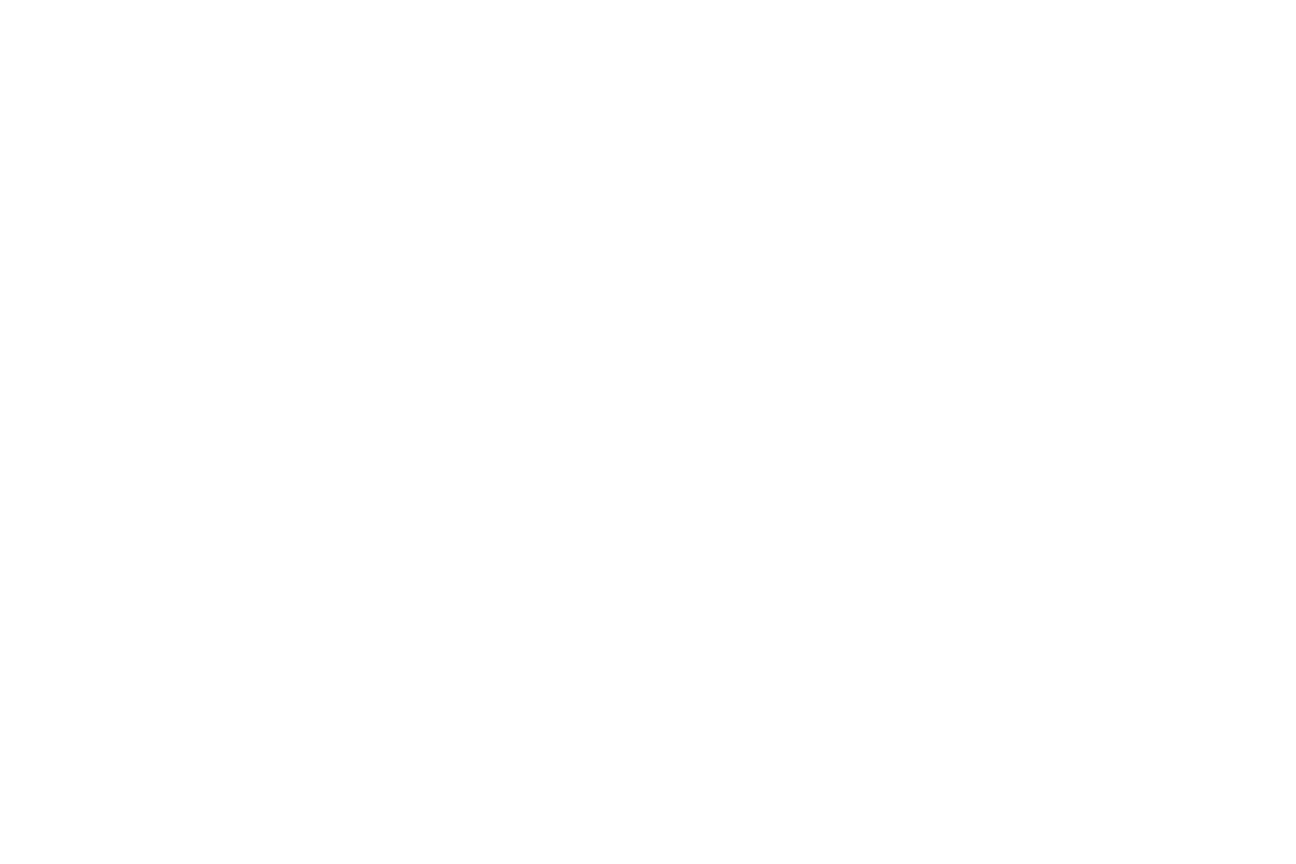

<IPython.core.display.Javascript object>


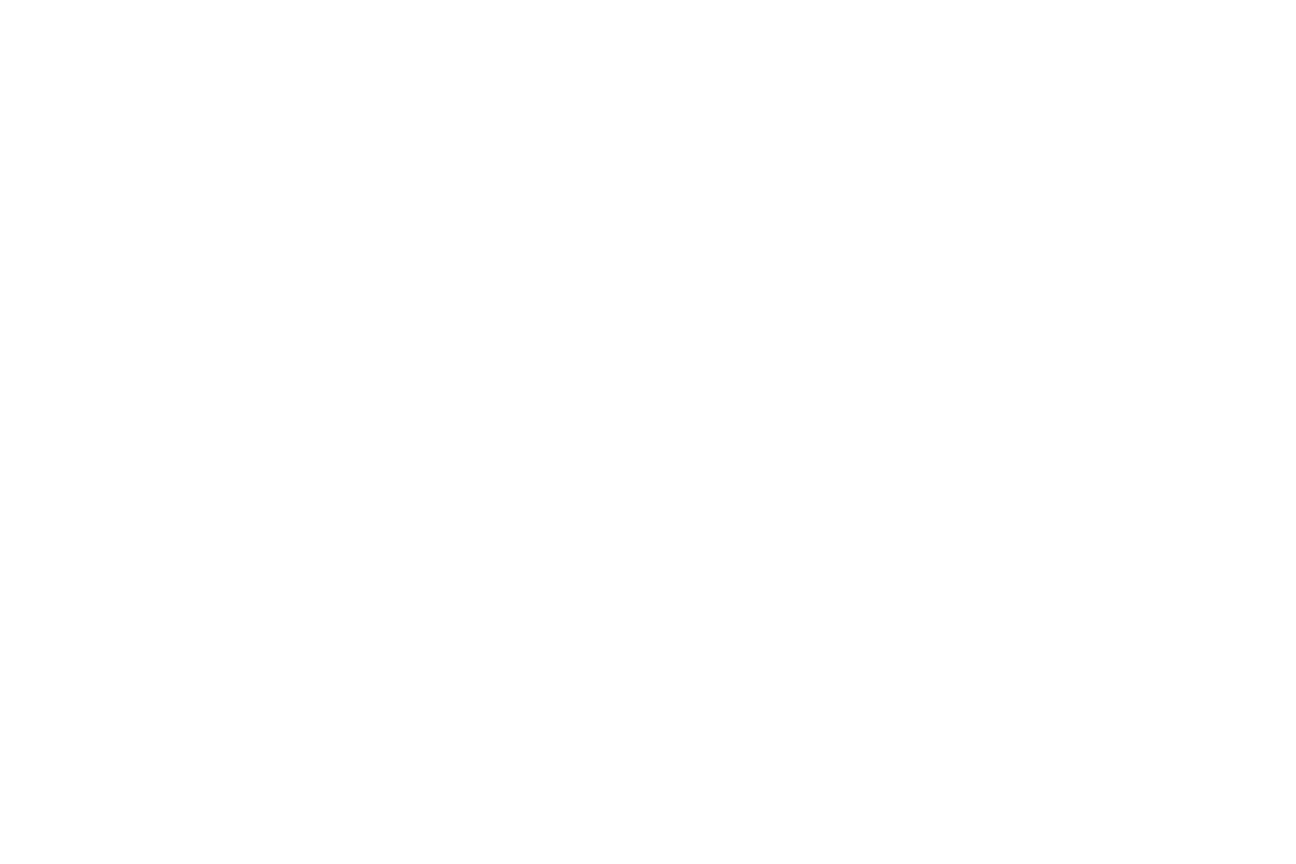

In [59]:
data_to_plot = [df5, df6]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [60]:
df5.std()

0.83539628197029

In [61]:
df6.sem()

0.0008364296695612073

# Creating visualizations for comparing metrics related to singular and pairwise action value for different checkpoints

In [62]:
# Compute dataset for creating the visualizations. Dataset is only created based on attacker data.

feature_importances = []
for data_id in range(101):
    # Retrieve data
    print(data_id)
    pairwise_util = np.load('utils_'+str(data_id)+'_pairs.npy')
    indiv_util = np.load('utils_'+str(data_id)+'_indiv.npy')
    batch_num_nodes = np.load('utils_'+str(data_id)+'_batch_num_nodes.npy')
    batch_num_edges = np.load('utils_'+str(data_id)+'_batch_num_edges.npy')
    obs = np.load('obs_'+str(data_id)+'.npy')
    
    alive_attacker_dist = [get_attacker_dist_to_door(ob) for ob in obs]
    indiv_util_terms = [get_indiv_def_utils_only(util, ob[2], ob[1]) for util, ob in zip(indiv_util, alive_attacker_dist)]
    
    alive_def_dist = np.concatenate([dist[0] for dist in alive_attacker_dist])
    indiv_util_term_final = np.concatenate(indiv_util_terms)
    dist_to_adhoc = np.concatenate([get_attacker_dist_to_adhoc_agent(ob) for ob in obs], axis=-1)
    
    rels_out = [get_defender_to_adhoc_agent_rel(ob) for ob in obs]
    in_rad_feats = np.concatenate([rel[0] for rel in rels_out])
    ad_hoc_vin_feats = np.concatenate([rel[1] for rel in rels_out])
    attacker_vin_feats = np.concatenate([rel[2] for rel in rels_out])
    
    # Features in the dataset remains the same
    # Agent distance to fort
    # Agent distance to the learning agent
    # Boolean flag whether attacker and the learning agent are in shooting range of each other
    # Boolean flag whether attacker is in the the learning agent's shooting cone
    # Boolean flag whether the learning agent is in the attacker's shooting cone
    
    print(alive_def_dist.shape, dist_to_adhoc.shape, in_rad_feats.shape, ad_hoc_vin_feats.shape, attacker_vin_feats.shape)
    df2 = pd.DataFrame(np.transpose(
        np.array(
            [alive_def_dist, dist_to_adhoc, in_rad_feats, ad_hoc_vin_feats, attacker_vin_feats]
        )
    ), columns=[
        'dist_to_fort', 'dist_to_adhoc_agent', 'in_shooting_of_each_other', 'attacker_in_ad_hoc_shooting_cone', 'ad_hoc_in_attacker_shooting_cone'
        ]
    )
    
    # Train xgboost model for each checkpoint to find the feature importance of the different features
    # for predicting the average singular utility
    
    import xgboost as xgb
    regressor = xgb.XGBRegressor(
        max_depth=4, n_estimators=80
    )
    regressor.fit(df2, indiv_util_term_final)
    
    feature_importances.append(regressor.feature_importances_)
    regressor.get_booster().dump_model('xgb_model_indiv_'+str(data_id)+".txt", with_stats=True)
    

0
(57754,) (57754,) (57754,) (57754,) (57754,)
1
(58047,) (58047,) (58047,) (58047,) (58047,)
2
(56131,) (56131,) (56131,) (56131,) (56131,)
3
(53623,) (53623,) (53623,) (53623,) (53623,)
4
(51897,) (51897,) (51897,) (51897,) (51897,)
5
(52527,) (52527,) (52527,) (52527,) (52527,)
6
(53718,) (53718,) (53718,) (53718,) (53718,)
7
(55727,) (55727,) (55727,) (55727,) (55727,)
8
(57685,) (57685,) (57685,) (57685,) (57685,)
9
(56200,) (56200,) (56200,) (56200,) (56200,)
10
(54107,) (54107,) (54107,) (54107,) (54107,)
11
(55549,) (55549,) (55549,) (55549,) (55549,)
12
(55533,) (55533,) (55533,) (55533,) (55533,)
13
(54334,) (54334,) (54334,) (54334,) (54334,)
14
(54244,) (54244,) (54244,) (54244,) (54244,)
15
(51714,) (51714,) (51714,) (51714,) (51714,)
16
(54918,) (54918,) (54918,) (54918,) (54918,)
17
(52751,) (52751,) (52751,) (52751,) (52751,)
18
(52677,) (52677,) (52677,) (52677,) (52677,)
19
(50564,) (50564,) (50564,) (50564,) (50564,)
20
(50622,) (50622,) (50622,) (50622,) (50622,)
21

In [63]:
# Print XGBoost feature importances

feature_importances

[array([0.51595503, 0.3065507 , 0.        , 0.07683584, 0.10065841],
       dtype=float32),
 array([0.5154323 , 0.0450212 , 0.        , 0.10623483, 0.33331168],
       dtype=float32),
 array([0.6701562 , 0.05185967, 0.        , 0.07293484, 0.2050493 ],
       dtype=float32),
 array([0.7248156 , 0.04704724, 0.        , 0.00074092, 0.22739622],
       dtype=float32),
 array([0.82602257, 0.04522325, 0.        , 0.03146632, 0.09728789],
       dtype=float32),
 array([0.90509135, 0.0215965 , 0.        , 0.02678602, 0.04652607],
       dtype=float32),
 array([0.7050003 , 0.03708855, 0.        , 0.20231979, 0.05559137],
       dtype=float32),
 array([0.72860897, 0.06225101, 0.        , 0.06227174, 0.14686818],
       dtype=float32),
 array([0.7132174 , 0.11949226, 0.        , 0.04136103, 0.12592934],
       dtype=float32),
 array([0.6059415 , 0.11306649, 0.        , 0.14750494, 0.13348709],
       dtype=float32),
 array([0.54071987, 0.2568771 , 0.        , 0.03526836, 0.16713467],
       dtyp

In [64]:
# Create dataset for pairwise utility analysis. Only attacker-defender pairs are considered in the dataset.

df_in_shooting_range = []
df_not_in_shooting_range = []
df_in_attacker_shooting_range = []
df_not_in_attacker_shooting_range = []
for data_id in range(101):
    # Retrieve data
    print(data_id)
    pairwise_util = np.load('utils_'+str(data_id)+'_pairs.npy')
    obs = np.load('obs_'+str(data_id)+'.npy')
    
    obs_pair_rels = [get_attacker_to_defender_rel(ob) for ob in obs]
    distance_between_agents = np.concatenate([ob[0] for ob in obs_pair_rels])
    guard_to_fort = np.concatenate([ob[1] for ob in obs_pair_rels])
    attacker_to_fort = np.concatenate([ob[2] for ob in obs_pair_rels])
    in_radius = np.concatenate([ob[3] for ob in obs_pair_rels])
    in_guard_shoot_range = np.concatenate([ob[4] for ob in obs_pair_rels])
    in_attacker_shoot_range = np.concatenate([ob[5] for ob in obs_pair_rels])
    
    pairwise_list = [get_agent_pairwise_matrices(ob, pairwise_ut) for ob, pairwise_ut in zip(obs, pairwise_util)]
    all_pairwise_list = np.concatenate(pairwise_list, axis=0)
    all_pairwise_list_shoot = all_pairwise_list[:,:,7]
    all_pairwise_list_shot_at = all_pairwise_list[:,7,:]
    
    mean_shoots = np.mean(all_pairwise_list_shoot, axis= -1)
    mean_shoot_at = np.mean(all_pairwise_list_shot_at, axis= -1)
    
    distance_between_agents = np.concatenate([ob[0] for ob in obs_pair_rels])
    guard_to_fort = np.concatenate([ob[1] for ob in obs_pair_rels])
    attacker_to_fort = np.concatenate([ob[2] for ob in obs_pair_rels])
    in_radius = np.concatenate([ob[3] for ob in obs_pair_rels])
    in_guard_shoot_range = np.concatenate([ob[4] for ob in obs_pair_rels])
    in_attacker_shoot_range = np.concatenate([ob[5] for ob in obs_pair_rels])
    pairwise_mean = np.array(mean_shoots)
    pairwise_mean_shot_at = np.array(mean_shoot_at)

    
    # Features consists of :
    # Distance between the attacker and a defender pair.
    # Defender distance to fort (for the defender in the pair).
    # Attacker distance to fort (for the attacker in the pair).
    # Boolean flag for whether attacker and defenders are in the radius of shooting from each other.
    # Boolean flag for whether the attacker is inside the defender's shooting range.
    # Boolean flag for whether the defender is inside the attacker's shooting range.
    # (Analyzed metrics) The average of entries in the pairwise utility matrix when defender chooses shoot.
    # (Analyzed metrics) The average of entries in the pairwise utility matrix when attacker chooses shoot.
    
    df4 = pd.DataFrame(np.transpose(
            np.array(
                [distance_between_agents, guard_to_fort, attacker_to_fort, in_radius, 
                 in_guard_shoot_range, in_attacker_shoot_range, pairwise_mean, pairwise_mean_shot_at]
            )
        ), columns=[
            'distance_between_agents', 'dist_guard_to_fort', 'dist_attacker_to_fort',
            'in_radius', 'in_guard_shooting_range', 'in_attacker_shooting_range', 
            'mean_shoots', 'mean_shot_at'
        ]
    )
    
    df5 = df4[df4.in_guard_shooting_range == 1]
    df6 = df4[df4.in_guard_shooting_range == 0]
    df7 = df4[df4.in_attacker_shooting_range == 1]
    df8 = df4[df4.in_attacker_shooting_range == 0]
    
    df_in_shooting_range.append(df5)
    df_not_in_shooting_range.append(df6)
    df_in_attacker_shooting_range.append(df7)
    df_not_in_attacker_shooting_range.append(df8)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [65]:
for idx, df in enumerate(df_in_shooting_range):
    df["checkpoint"] = idx
for idx, df in enumerate(df_not_in_shooting_range):
    df["checkpoint"] = idx 
for idx, df in enumerate(df_in_attacker_shooting_range): 
    df["checkpoint"] = idx 
for idx, df in enumerate(df_not_in_attacker_shooting_range):
    df["checkpoint"] = idx 

/Users/arrasy/miniconda2/envs/docEnv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/arrasy/miniconda2/envs/docEnv/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/arrasy/miniconda2/envs/docEnv/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

## Further preprocessing of dataset to create pandas dataframe

In [66]:
df_combined_in_shooting_range = pd.concat(df_in_shooting_range)
df_combined_not_in_shooting_range = pd.concat(df_not_in_shooting_range)
df_combined_in_attacker_shooting_range = pd.concat(df_in_attacker_shooting_range)
df_combined_not_in_attacker_shooting_range = pd.concat(df_not_in_attacker_shooting_range)

In [67]:
df_combined_in_shooting_range["category"] = "In shooting range"
df_combined_not_in_shooting_range["category"] = "Not in shooting range"

df_combined_guard = pd.concat([df_combined_in_shooting_range, df_combined_not_in_shooting_range])


In [68]:
df_combined_in_attacker_shooting_range["category"] = "In shooting range"
df_combined_not_in_attacker_shooting_range["category"] = "Not in shooting range"

df_combined_attacker = pd.concat([df_combined_in_attacker_shooting_range, df_combined_not_in_attacker_shooting_range])

In [69]:
dfs = []

def get_indiv_def_utils_shoot_only(utils, attacker_nums, defender_nums):
    total_agents = 0
    indiv_utils_out = []
    for a_num, d_num in zip(attacker_nums, defender_nums):
        if a_num != 0:
            indiv_utils_out.append(utils[total_agents+d_num: total_agents+a_num+d_num, 7])
        else:
            indiv_utils_out.append(np.asarray([]))
        total_agents += a_num + d_num
        
    return np.concatenate(indiv_utils_out)

iii = 0
for data_id in range(101):
    # Retrieve data
    print(iii)
    pairwise_util = np.load('utils_'+str(data_id)+'_pairs.npy')
    indiv_util = np.load('utils_'+str(data_id)+'_indiv.npy')
    batch_num_nodes = np.load('utils_'+str(data_id)+'_batch_num_nodes.npy')
    batch_num_edges = np.load('utils_'+str(data_id)+'_batch_num_edges.npy')
    obs = np.load('obs_'+str(data_id)+'.npy')
    
    alive_attacker_dist = [get_attacker_dist_to_door(ob) for ob in obs]
    indiv_util_terms = [get_indiv_def_utils_shoot_only(util, ob[2], ob[1]) for util, ob in zip(indiv_util, alive_attacker_dist)]
    
    alive_def_dist = np.concatenate([dist[0] for dist in alive_attacker_dist])
    indiv_util_term_final = np.concatenate(indiv_util_terms)
    dist_to_adhoc = np.concatenate([get_attacker_dist_to_adhoc_agent(ob) for ob in obs], axis=-1)
    
    rels_out = [get_defender_to_adhoc_agent_rel(ob) for ob in obs]
    in_rad_feats = np.concatenate([rel[0] for rel in rels_out])
    ad_hoc_vin_feats = np.concatenate([rel[1] for rel in rels_out])
    attacker_vin_feats = np.concatenate([rel[2] for rel in rels_out])
    
    df2 = pd.DataFrame(np.transpose(
        np.array(
            [alive_def_dist, dist_to_adhoc, in_rad_feats, ad_hoc_vin_feats, attacker_vin_feats, indiv_util_term_final]
        )
    ), columns=[
        'dist_to_fort', 'dist_to_adhoc_agent', 'in_shooting_of_each_other', 'attacker_in_ad_hoc_shooting_cone', 'ad_hoc_in_attacker_shooting_cone', 'shoot_term'
        ]
    )
    df2['checkpoint'] = data_id
    dfs.append(df2)
    iii += 1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [70]:
all_data_util = pd.concat(dfs)


In [71]:
all_data_util.rename(columns={'ad_hoc_in_attacker_shooting_cone':'category'}, inplace=True)
all_data_util.loc[all_data_util.category==0,"category"] = "Not in attacker shooting range"
all_data_util.loc[all_data_util.category==1,"category"] = "In attacker shooting range"

## Visualize feature importance of features in the singular utility dataset in predicting the average singular utility

In [72]:
import pandas as pd
train_perf_df = pd.read_csv('run-annltlptcl-tag-Rewards_train_set.csv')
train_perf_df.rename(columns={"Step":"checkpoint", "Value":"Returns"}, inplace=True)

<IPython.core.display.Javascript object>


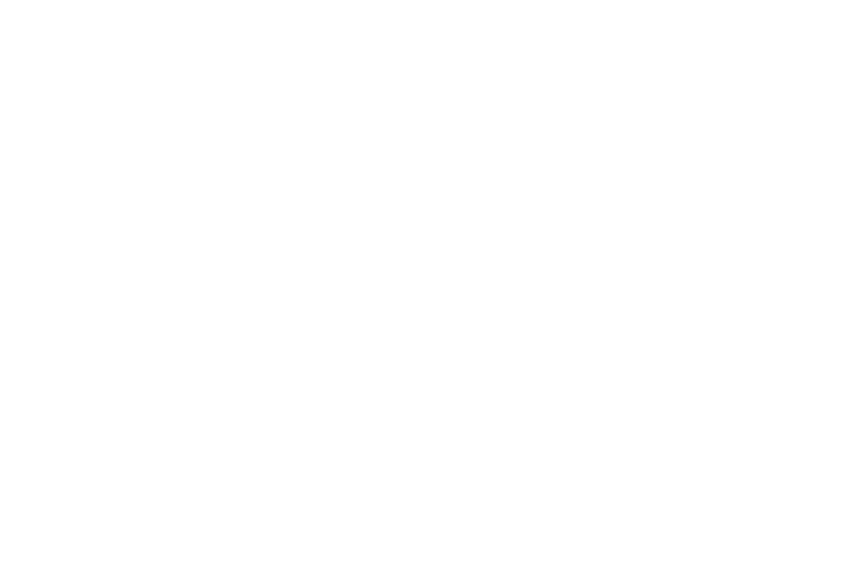

<IPython.core.display.Javascript object>


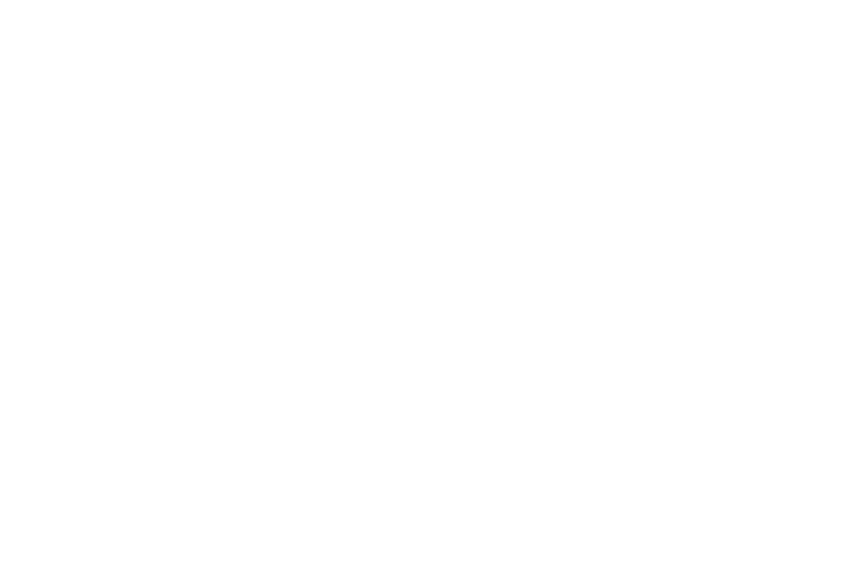

In [73]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

steps = np.array(list(range(101)))
dist_to_fort = np.array([imp[0] for imp in feature_importances])
dist_to_adhoc = np.array([imp[1] for imp in feature_importances])
in_ad_hoc_shooting_cone = np.array([imp[3] for imp in feature_importances])
in_attacker_shooting_cone = np.array([imp[4] for imp in feature_importances])

np_data = np.transpose(np.array([dist_to_fort, in_ad_hoc_shooting_cone]))
df_feat = pd.DataFrame(np_data, index=list(range(101)), 
                    columns=['Dist to Fort', 'In Ad Hoc Range'])

import seaborn as sns
g = sns.lineplot(data=df_feat)
g.legend(loc="lower right")
g.set(xlabel='Checkpoint', ylabel='XGBoost Feature Importance')

ax2 = g.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Returns')  # we already handled the x-label with ax1
ax2.plot(train_perf_df.checkpoint, train_perf_df.Returns, color=color, alpha=0.4)

plt.savefig("NewFeatureImportance3.pdf")



## Visualize the average of pairwise utility entries associated with defenders choosing to shoot. This is categorized based on whether the attacker is in the defender's shooting range or not.

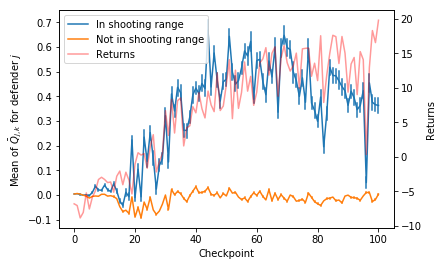

In [86]:
%matplotlib inline
plt.clf()
ax = sns.lineplot(
    data=df_combined_guard, 
    x="checkpoint", 
    y="mean_shoots", 
    hue="category",
    err_style="bars", ci=95
)
ax.set(xlabel='Checkpoint', ylabel='Mean of shoot entries in pairwise matrix')
ax.set_ylabel(r'Mean of $\bar{Q}_{j,k}$ for defender $j$')
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[1:], labels=labels[1:])

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Returns')  # we already handled the x-label with ax1
ax2.plot(train_perf_df.checkpoint, train_perf_df.Returns, color=color, alpha=0.4)
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend([],[], frameon=False)
ax2.legend(handles[1:] + handles2, labels[1:] + labels2, loc=0)

plt.savefig("Pairwise_shoot_new.pdf")

## Visualize the average of pairwise utility entries associated with attackers choosing to shoot. This is categorized based on whether the defender is in the attacker's shooting range or not.

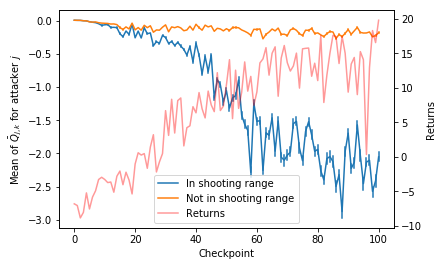

In [87]:
%matplotlib inline
plt.clf()
ax = sns.lineplot(
    data=df_combined_attacker, 
    x="checkpoint", 
    y="mean_shot_at", 
    hue="category",
    err_style="bars", ci=95
)
ax.set(xlabel='Checkpoint', ylabel='Mean of attacker shoot entries in matrix')
ax.set_ylabel(r'Mean of $\bar{Q}_{j,k}$ for attacker $j$')
handles, labels = ax.get_legend_handles_labels()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Returns')  # we already handled the x-label with ax1
ax2.plot(train_perf_df.checkpoint, train_perf_df.Returns, color=color, alpha=0.4)
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend([],[], frameon=False)
ax2.legend(handles[1:] + handles2, labels[1:] + labels2, loc="lower center")

plt.savefig("Pairwise_shoot_attacker.pdf")

## Visualize the average of singular utility entries associated with attackers. This is categorized based on whether the attacker is in the learning agent's shooting range or not.

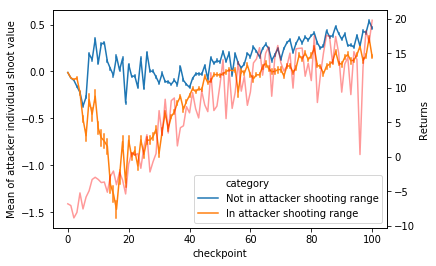

In [88]:
%matplotlib inline
plt.clf()
ax = sns.lineplot(
    data=all_data_util, 
    x="checkpoint", 
    y="shoot_term", 
    hue="category",
    err_style="bars", ci=95
)
ax.set(xlabel='checkpoint', ylabel='Mean of attacker individual shoot value')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Returns')  # we already handled the x-label with ax1
ax2.plot(train_perf_df.checkpoint, train_perf_df.Returns, color=color, alpha=0.4)

plt.savefig("Indiv_shoot_new.pdf")

In [89]:
df_combined_guard_in_shoot_range = df_combined_guard[df_combined_guard.category=="In shooting range"]

In [90]:
mean_data_by_shoot = df_combined_guard_in_shoot_range.groupby('checkpoint').mean().mean_shoots

In [92]:
scipy.stats.pearsonr(mean_data_by_shoot, train_perf_df.Returns)

(0.8532895363490163, 9.40489294741744e-30)

In [94]:
data_poinst = []
counter = 0
for idx in dfs:
    data_poinst.append([counter,scipy.stats.pearsonr(idx.dist_to_fort, idx.shoot_term)[0]])
    counter += 1

In [95]:
np_counter = np.asarray(data_poinst)

In [96]:
counter_dataframe = pd.DataFrame(np_counter, columns=['Checkpoint', 'Dist To Fort-Mean Indiv Util Pearson Correlation'])

## Visualize the pearson correlation between an attacker's distance to fort and their average singular utility value.

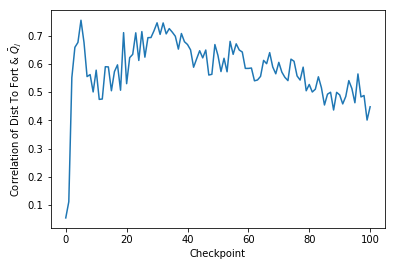

In [97]:
sns.lineplot(data=counter_dataframe, x="Checkpoint", y="Dist To Fort-Mean Indiv Util Pearson Correlation")
plt.ylabel(r'Correlation of Dist To Fort & $\bar{Q}_{j}$')
plt.savefig("DistToFortCorrelation.pdf")